## Predicting Employee Attrition Using Machine Learning

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys,traceback

In [4]:
df=pd.read_csv('train.csv')

In [9]:
cal_name=df.columns.tolist()

print("Column names:")
print(cal_name)

print("\nSample data:")
df.head()

Column names:
['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary', 'Attrition']

Sample data:


satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   

   average_montly_hours  time_spend_company  Work_accident  \
0                   167                   3              0   
1                   272                   6              0   
2                   282                   4              0   
3                   169                   3              0   
4                   163                   3              0   

   promotion_last_5years Department  salary  Attrition  
0                      0      sales     low          1  
1                      0      sales  medium          1  
2                      0      sales  medium          1  
3                      0      sales     low          1  
4                      0      sales     low          1

In [10]:
df=df.rename(columns={'Department':'department'})

In [12]:
df.dtypes

satisfaction_level        float64
last_evaluation_rating    float64
projects_worked_on          int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
promotion_last_5years       int64
department                 object
salary                     object
Attrition                   int64
dtype: object

In [15]:
df.isnull().sum()

satisfaction_level        0
last_evaluation_rating    0
projects_worked_on        0
average_montly_hours      0
time_spend_company        0
Work_accident             0
promotion_last_5years     0
department                0
salary                    0
Attrition                 0
dtype: int64

In [16]:
df.shape

(25491, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25491 entries, 0 to 25490
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      25491 non-null  float64
 1   last_evaluation_rating  25491 non-null  float64
 2   projects_worked_on      25491 non-null  int64  
 3   average_montly_hours    25491 non-null  int64  
 4   time_spend_company      25491 non-null  int64  
 5   Work_accident           25491 non-null  int64  
 6   promotion_last_5years   25491 non-null  int64  
 7   department              25491 non-null  object 
 8   salary                  25491 non-null  object 
 9   Attrition               25491 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.9+ MB


In [20]:
df.describe().T

count        mean        std   min    25%    50%  \
satisfaction_level      25491.0    6.137704   2.486316   0.9    4.4    6.5   
last_evaluation_rating  25491.0    7.167832   1.710754   3.6    5.6    7.2   
projects_worked_on      25491.0    4.215174   1.324228   2.0    3.0    4.0   
average_montly_hours    25491.0  205.286846  50.182916  96.0  160.0  204.0   
time_spend_company      25491.0    3.497156   1.457715   2.0    3.0    3.0   
Work_accident           25491.0    0.146012   0.353125   0.0    0.0    0.0   
promotion_last_5years   25491.0    0.021419   0.144780   0.0    0.0    0.0   
Attrition               25491.0    0.234985   0.423998   0.0    0.0    0.0   

                          75%    max  
satisfaction_level        8.2   10.0  
last_evaluation_rating    8.7   10.0  
projects_worked_on        5.0    8.0  
average_montly_hours    249.0  320.0  
time_spend_company        4.0   10.0  
Work_accident             0.0    1.0  
promotion_last_5years     0.0    1.0  
Attrition                 0.0    1.0

In [22]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [23]:
df['department']=np.where(df['department']=='support', 'technical', df['department'] )
df['department']=np.where(df['department']=='IT', 'technical', df['department'] )


In [24]:
print(df['department'].unique())

['sales' 'accounting' 'hr' 'technical' 'management' 'product_mng'
 'marketing' 'RandD']


## Data Exploration

In [25]:
df['Attrition'].value_counts()

0    19501
1     5990
Name: Attrition, dtype: int64

In [27]:
df.groupby('Attrition').mean()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
Attrition                                                                   
0                    6.668899                7.159582            4.198041   
1                    4.408347                7.194691            4.270952   

           average_montly_hours  time_spend_company  Work_accident  \
Attrition                                                            
0                    203.199836            3.378647       0.176247   
1                    212.081302            3.882972       0.047579   

           promotion_last_5years  
Attrition                         
0                       0.026665  
1                       0.004341

In [28]:
df.groupby('department').mean()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
department                                                                    
RandD                  6.186966                7.095356            4.250936   
accounting             5.835790                7.193845            4.224924   
hr                     6.037272                7.072720            4.078509   
management             6.218932                7.247423            4.262418   
marketing              6.200756                7.165430            4.087973   
product_mng            6.200727                7.185535            4.223910   
sales                  6.164850                7.110125            4.183995   
technical              6.137237                7.212923            4.257805   

             average_montly_hours  time_spend_company  Work_accident  \
department                                                             
RandD                  204.902622            3.361049       0.173783   
accounting             205.725684            3.530395       0.127660   
hr                     203.311657            3.357653       0.122125   
management             205.244611            4.299906       0.160262   
marketing              203.987629            3.578694       0.158763   
product_mng            203.686262            3.456407       0.149934   
sales                  205.039581            3.541804       0.143984   
technical              206.091864            3.410974       0.145222   

             promotion_last_5years  Attrition  
department                                     
RandD                     0.034457   0.153558  
accounting                0.018237   0.265957  
hr                        0.021412   0.283902  
management                0.111528   0.134958  
marketing                 0.050172   0.229553  
product_mng               0.000000   0.218626  
sales                     0.023519   0.240212  
technical                 0.008798   0.245317

In [29]:
df.groupby('salary').mean()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
salary                                                                   
high              6.386124                7.049012            4.170743   
low               6.019963                7.180714            4.215674   
medium            6.222742                7.176300            4.223226   

        average_montly_hours  time_spend_company  Work_accident  \
salary                                                            
high              203.784102            3.686736       0.153340   
low               205.429090            3.441506       0.144884   
medium            205.417351            3.523353       0.145868   

        promotion_last_5years  Attrition  
salary                                    
high                 0.060207   0.066792  
low                  0.008385   0.291945  
medium               0.028644   0.203156

## Data visulation

<Figure size 1008x576 with 0 Axes>

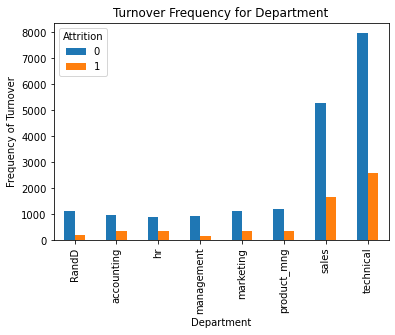

In [41]:
%matplotlib inline
plt.figure(figsize=(14,8))
pd.crosstab(df['department'],df['Attrition']).plot(kind='bar');
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')
plt.show()

In [46]:
#Bar chart for employee salary level and the frequency of turnover
table=pd.crosstab(df.salary, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

In [47]:
pd.crosstab(df.department, df.Attrition)

Attrition       0     1
department             
RandD        1130   205
accounting    966   350
hr            903   358
management    923   144
marketing    1121   334
product_mng  1183   331
sales        5298  1675
technical    7977  2593

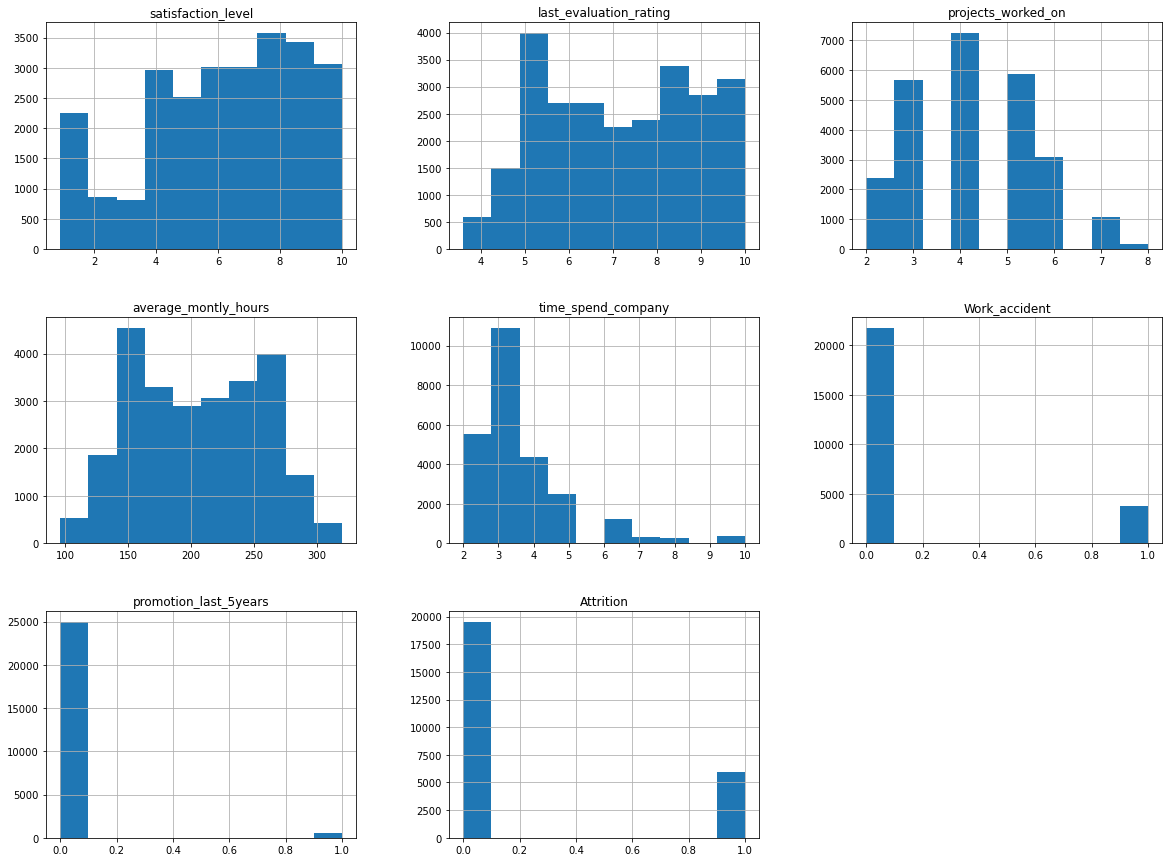

In [50]:
df.hist(bins=10, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

In [51]:
df.head()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   

   average_montly_hours  time_spend_company  Work_accident  \
0                   167                   3              0   
1                   272                   6              0   
2                   282                   4              0   
3                   169                   3              0   
4                   163                   3              0   

   promotion_last_5years department  salary  Attrition  
0                      0      sales     low          1  
1                      0      sales  medium          1  
2                      0      sales  medium          1  
3                      0      sales     low          1  
4                      0      sales     low          1

In [52]:
df = pd.get_dummies(df, columns=['department', 'salary'])


In [53]:
df.head()

satisfaction_level  last_evaluation_rating  projects_worked_on  \
0                 3.8                     5.3                   3   
1                 8.0                     8.6                   6   
2                 1.1                     8.8                   8   
3                 3.7                     5.2                   3   
4                 4.1                     5.0                   3   

   average_montly_hours  time_spend_company  Work_accident  \
0                   167                   3              0   
1                   272                   6              0   
2                   282                   4              0   
3                   169                   3              0   
4                   163                   3              0   

   promotion_last_5years  Attrition  department_RandD  department_accounting  \
0                      0          1                 0                      0   
1                      0          1                 0                      0   
2                      0          1                 0                      0   
3                      0          1                 0                      0   
4                      0          1                 0                      0   

   department_hr  department_management  department_marketing  \
0              0                      0                     0   
1              0                      0                     0   
2              0                      0                     0   
3              0                      0                     0   
4              0                      0                     0   

   department_product_mng  department_sales  department_technical  \
0                       0                 1                     0   
1                       0                 1                     0   
2                       0                 1                     0   
3                       0                 1                     0   
4                       0                 1                     0   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25491 entries, 0 to 25490
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      25491 non-null  float64
 1   last_evaluation_rating  25491 non-null  float64
 2   projects_worked_on      25491 non-null  int64  
 3   average_montly_hours    25491 non-null  int64  
 4   time_spend_company      25491 non-null  int64  
 5   Work_accident           25491 non-null  int64  
 6   promotion_last_5years   25491 non-null  int64  
 7   Attrition               25491 non-null  int64  
 8   department_RandD        25491 non-null  uint8  
 9   department_accounting   25491 non-null  uint8  
 10  department_hr           25491 non-null  uint8  
 11  department_management   25491 non-null  uint8  
 12  department_marketing    25491 non-null  uint8  
 13  department_product_mng  25491 non-null  uint8  
 14  department_sales        25491 non-null

In [56]:
df_vars=df.columns.values.tolist()
df_vars

['satisfaction_level',
 'last_evaluation_rating',
 'projects_worked_on',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'Attrition',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [57]:
y=['Attrition']
X=[i for i in df_vars if i not in y]

In [58]:
X

['satisfaction_level',
 'last_evaluation_rating',
 'projects_worked_on',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_RandD',
 'department_accounting',
 'department_hr',
 'department_management',
 'department_marketing',
 'department_product_mng',
 'department_sales',
 'department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [63]:
lr = LogisticRegression()
rfe = RFE(lr, 10)
rfe = rfe.fit(df[X], df[y])
print(rfe.support_)
print(rfe.ranking_)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\anac

[ True False False False  True  True  True  True False  True  True False
 False False False  True  True  True]
[1 3 2 9 1 1 1 1 4 1 1 6 8 7 5 1 1 1]


In [65]:
cols=['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low','salary_medium'] 
X=df[cols]
y=df['Attrition']

In [66]:
X

satisfaction_level  time_spend_company  Work_accident  \
0                     3.8                   3              0   
1                     8.0                   6              0   
2                     1.1                   4              0   
3                     3.7                   3              0   
4                     4.1                   3              0   
...                   ...                 ...            ...   
25486                 4.0                   3              0   
25487                 3.7                   3              0   
25488                 3.7                   3              0   
25489                 1.1                   4              0   
25490                 3.7                   3              0   

       promotion_last_5years  department_RandD  department_hr  \
0                          0                 0              0   
1                          0                 0              0   
2                          0                 0              0   
3                          0                 0              0   
4                          0                 0              0   
...                      ...               ...            ...   
25486                      0                 0              0   
25487                      0                 0              0   
25488                      0                 0              0   
25489                      0                 0              0   
25490                      0                 0              0   

       department_management  salary_high  salary_low  salary_medium  
0                          0            0           1              0  
1                          0            0           0              1  
2                          0            0           0              1  
3                          0            0           1              0  
4                          0            0           1              0  
...                      ...          ...         ...            ...  
25486                      0            0           1              0  
25487                      0            0           1              0  
25488                      0            0           1              0  
25489                      0            0           1              0  
25490                      0            0           1              0  

[25491 rows x 10 columns]

## Logistic Regression Model

In [67]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [71]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.2f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.77


## Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
r_forest=RandomForestClassifier()
r_forest.fit(X_train, y_train)
print('Random forest accuracy: {:.2f}'.format(accuracy_score(y_test, r_forest.predict(X_test))))

Random forest accuracy: 0.97


## Support Vector Machine

In [75]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Support Vector Machine accuracy: {:.2f}'.format(accuracy_score(y_test, svm.predict(X_test))))

Support Vector Machine accuracy: 0.89


## XGBoost Classifier

In [76]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print('XGBoost Classifie accuracy: {:.2f}'.format(accuracy_score(y_test, xgb.predict(X_test))))

XGBoost Classifie accuracy: 0.96


## 10 Fold Cross Validation

In [78]:
#Random Forest
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("cross validation average accuracy for Random Forest Classifier: %.3f" % (results.mean()))

cross validation average accuracy for Random Forest Classifier: 0.960


In [79]:
#Support Vector Machine 
kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
svm = SVC()
scoring = 'accuracy'
results = model_selection.cross_val_score(svm, X_train, y_train, cv=kfold, scoring=scoring)
print("cross validation average accuracy for Support Vector Machine: %.3f" % (results.mean()))

cross validation average accuracy for Support Vector Machine: 0.889


In [80]:
#XGBoost Classifier
kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
xgb = XGBClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(xgb, X_train, y_train, cv=kfold, scoring=scoring)
print("cross validation average accuracy for XGBoost Classifier: %.3f" % (results.mean()))

cross validation average accuracy for XGBoost Classifier: 0.959


# Classification report 

In [81]:
#Classification report for Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, r_forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6474
           1       0.92      0.93      0.93      1939

    accuracy                           0.97      8413
   macro avg       0.95      0.95      0.95      8413
weighted avg       0.97      0.97      0.97      8413



C:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


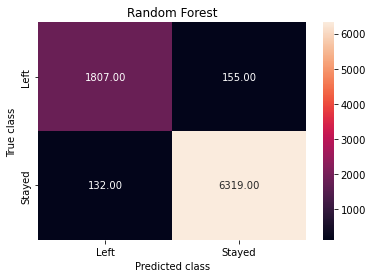

In [82]:
#Confusion Matrix for Random Forest
y_pred = r_forest.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [84]:
#Confusion Matrix for Support Vector Machine 
svm.fit(X_train, y_train)
print(classification_report(y_test, svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      6474
           1       0.73      0.79      0.76      1939

    accuracy                           0.89      8413
   macro avg       0.84      0.85      0.84      8413
weighted avg       0.89      0.89      0.89      8413



C:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0.5, 1.0, 'support vector machine')

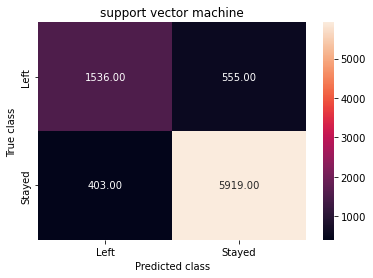

In [90]:
y_pred = svm.predict(X_test)
svm_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(svm_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('support vector machine')


In [87]:
# xgboost
xgb.fit(X_train, y_train)
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6474
           1       0.92      0.92      0.92      1939

    accuracy                           0.96      8413
   macro avg       0.95      0.95      0.95      8413
weighted avg       0.96      0.96      0.96      8413



C:\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0.5, 1.0, 'xgboost')

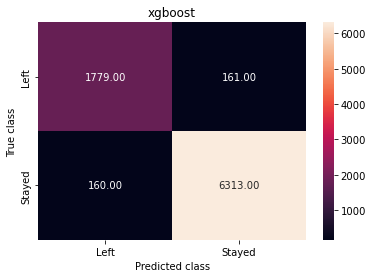

In [91]:
y_pred = xgb.predict(X_test)
xgb_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(xgb_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('xgboost')


## Variable Importance for Random Forest Classifier

In [96]:

feature_labels = np.array(['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low','salary_medium'])
importance = r_forest.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))


department_management-0.30%
promotion_last_5years-0.40%
department_hr-0.41%
department_RandD-0.47%
salary_medium-0.48%
salary_high-0.89%
salary_low-1.21%
Work_accident-2.21%
time_spend_company-32.61%
satisfaction_level-61.03%


## Variable Importance for XGBoost Classifier

In [97]:
feature_labels = np.array(['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low','salary_medium'])
importance = xgb.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-1.49%
salary_medium-2.08%
department_RandD-2.80%
department_hr-3.14%
salary_low-3.86%
promotion_last_5years-4.75%
Work_accident-6.11%
salary_high-7.36%
satisfaction_level-28.61%
time_spend_company-39.80%


# Hperparameter Tuning

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
#Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [100]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [102]:
rf = RandomForestClassifier()

In [105]:
rf_tuned=RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='accuracy', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1).fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  18.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  17.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  18.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  17.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  24.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  23.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

In [106]:
rf_tuned.best_score_

0.9654782809204738

In [107]:
rf_tuned.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [108]:
r_forest=RandomForestClassifier(n_estimators= 1000,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth=25)
r_forest.fit(X_train, y_train)
print('Random forest accuracy: {:.2f}'.format(accuracy_score(y_test, r_forest.predict(X_test))))

Random forest accuracy: 0.97
